## Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
import datetime 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from scipy import stats

In [2]:
try:
    retail = pd.read_csv('retail_dataset_us.csv')
except :
    retail = pd.read_csv('/datasets/retail_dataset_us.csv')

In [3]:
try:
    product = pd.read_csv('product_codes_us.csv',sep=';')
except :
    product = pd.read_csv('/datasets/product_codes_us.csv',sep=';')

In [4]:
print(retail.info())
print(retail.shape)
print(retail.head())
print(retail.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   loyalty_program  105335 non-null  int64  
 6   ShopID           105335 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB
None
(105335, 7)
  purchaseid item_ID  Quantity         purchasedate  CustomerID  \
0     538280   21873        11  2016-12-10 12:50:00     18427.0   
1     538862   22195         0  2016-12-14 14:11:00     22389.0   
2     538855   21239         7  2016-12-14 13:50:00     22182.0   
3     543543   22271         0  2017-02-09 15:33:00     23522.0   
4     543812   79321         0  2017-02-13 14:40:00  

In [5]:
print(product.info())
print(product.shape)
print(product.head())
print(product.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB
None
(3159, 2)
  productID  price_per_one
0     10002           0.85
1     10080           0.85
2     10120           0.21
3    10123C           0.65
4    10124A           0.42
         productID  price_per_one
3154  gift_0001_20          16.67
3155  gift_0001_30          25.00
3156  gift_0001_40          34.04
3157  gift_0001_50          42.55
3158             m           2.55


In [6]:
#check missing values
retail.isnull().sum()

purchaseid             0
item_ID                0
Quantity               0
purchasedate           0
CustomerID         36210
loyalty_program        0
ShopID                 0
dtype: int64

In [7]:
missing = retail[retail['CustomerID'].isna()].groupby('ShopID')['purchaseid'].count()
missing

ShopID
Shop 0     36009
Shop 21       14
Shop 23        2
Shop 25       57
Shop 6       128
Name: purchaseid, dtype: int64

Shop 0 has 36009 missing rows.

In [8]:
missing.nunique()

5

Only 5 unique values missing?

In [9]:
product.isnull().sum()

productID        0
price_per_one    0
dtype: int64

In [10]:
retail.duplicated().sum()

1033

In [11]:
retail.duplicated().sum() / len(retail)

0.009806806854321925

Percentage of missing values is less then 1% so we can drop them.

In [12]:
retail = retail.drop_duplicates().reset_index(drop = True)
retail.duplicated().sum()

0

In [13]:
product.duplicated().sum()

0

In [14]:
#describe
retail.describe().transpose()

count          mean          std      min      25%  \
Quantity         104302.0      7.883003   329.565540 -74216.0      0.0   
CustomerID        68154.0  21011.165889  1766.665163  18025.0  19533.0   
loyalty_program  104302.0      0.224464     0.417231      0.0      0.0   

                     50%      75%      max  
Quantity             2.0      7.0  74214.0  
CustomerID       20977.0  22633.0  23962.0  
loyalty_program      0.0      0.0      1.0

Negative values in 'quantity' column

In [15]:
retail.sample(15)

purchaseid item_ID  Quantity         purchasedate  CustomerID  \
29011      536544  47559B         1  2016-12-01 14:32:00         NaN   
80577      540540   22752         2  2017-01-09 15:10:00     22897.0   
41171      537692   22423         0  2016-12-08 10:40:00     20475.0   
73574      543000   48185         2  2017-02-02 12:17:00         NaN   
41614      536865   22666         2  2016-12-03 11:28:00         NaN   
69450      545027   22384         0  2017-02-25 14:59:00         NaN   
43967      543736   22784         5  2017-02-11 12:36:00     20723.0   
59627      536544   21935         0  2016-12-01 14:32:00         NaN   
102364     537253   21891         0  2016-12-06 10:53:00         NaN   
21636      543277   20685         1  2017-02-06 14:33:00     21487.0   
55580      544205  85099B         0  2017-02-17 10:31:00         NaN   
29469      541424  47585A         0  2017-01-17 17:57:00         NaN   
17425      542835  85230F        23  2017-02-01 11:30:00     19618.0   
3279       545045   22721         1  2017-02-27 11:40:00     21387.0   
103657     541569   20750         1  2017-01-19 12:14:00     19199.0   

        loyalty_program   ShopID  
29011                 0   Shop 0  
80577                 1   Shop 4  
41171                 0  Shop 16  
73574                 0   Shop 0  
41614                 0   Shop 0  
69450                 0   Shop 0  
43967                 0  Shop 19  
59627                 0   Shop 0  
102364                0   Shop 0  
21636                 0   Shop 0  
55580                 0   Shop 0  
29469                 0   Shop 0  
17425                 0  Shop 28  
3279                  0  Shop 15  
103657                0  Shop 17

I can suppose that C means canceled order thats why we have quantity with minos

In [16]:
canceled_orders = retail.query("Quantity <0")
canceled_orders

purchaseid item_ID  Quantity         purchasedate  CustomerID  \
64        C539944   22776        -2  2016-12-23 11:38:00     20239.0   
109       C542910   20726        -2  2017-02-01 15:38:00     23190.0   
112       C542426   22418       -25  2017-01-28 09:32:00     19825.0   
253       C539726   22791       -11  2016-12-21 14:24:00     22686.0   
344       C544034   21878        -2  2017-02-15 11:28:00     20380.0   
...           ...     ...       ...                  ...         ...   
104132    C541650       M        -2  2017-01-20 11:44:00         NaN   
104143    C540246   79320        -2  2017-01-05 15:43:00     18760.0   
104180    C539467   22801        -2  2016-12-19 12:46:00     20723.0   
104217    C540847   22197        -3  2017-01-11 17:35:00     19137.0   
104267    C540164   21144       -13  2017-01-05 12:02:00     20590.0   

        loyalty_program   ShopID  
64                    0  Shop 27  
109                   1  Shop 19  
112                   0  Shop 27  
253                   1   Shop 3  
344                   0   Shop 9  
...                 ...      ...  
104132                0   Shop 0  
104143                0  Shop 19  
104180                0  Shop 13  
104217                0   Shop 0  
104267                0  Shop 16  

[2076 rows x 7 columns]

In [17]:
len(canceled_orders) / len(retail)

0.019903741059615346

In [18]:
#drop canceled orders
drop_index =  list(retail[retail['Quantity']<0].index)
retail = retail.drop(drop_index)
retail.query("Quantity <0")

Empty DataFrame
Columns: [purchaseid, item_ID, Quantity, purchasedate, CustomerID, loyalty_program, ShopID]
Index: []

In [19]:
product.describe().transpose()

count      mean       std  min   25%   50%   75%    max
price_per_one  3159.0  2.954495  7.213808  0.0  0.65  1.45  3.29  175.0

In [20]:
#convert column names to lowercase and rename column
retail.columns

Index(['purchaseid', 'item_ID', 'Quantity', 'purchasedate', 'CustomerID',
       'loyalty_program', 'ShopID'],
      dtype='object')

In [21]:
retail.columns = retail.columns.str.lower()
retail.columns

Index(['purchaseid', 'item_id', 'quantity', 'purchasedate', 'customerid',
       'loyalty_program', 'shopid'],
      dtype='object')

In [22]:
retail = retail.rename(columns = {'purchaseid':'purchase_id', 'purchasedate':'date','customerid':'cust_id', 'loyalty_program':'lp', 'shopid':'shop_id' })
retail.columns

Index(['purchase_id', 'item_id', 'quantity', 'date', 'cust_id', 'lp',
       'shop_id'],
      dtype='object')

In [23]:
#rename column
product.columns

Index(['productID', 'price_per_one'], dtype='object')

In [24]:
product = product.rename(columns = {'productID' : 'product_id'})
product.columns

Index(['product_id', 'price_per_one'], dtype='object')

In [25]:
#change data type
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102226 entries, 0 to 104301
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   purchase_id  102226 non-null  object 
 1   item_id      102226 non-null  object 
 2   quantity     102226 non-null  int64  
 3   date         102226 non-null  object 
 4   cust_id      66366 non-null   float64
 5   lp           102226 non-null  int64  
 6   shop_id      102226 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ MB


In [26]:
retail['date'] = pd.to_datetime(retail['date'])
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102226 entries, 0 to 104301
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   purchase_id  102226 non-null  object        
 1   item_id      102226 non-null  object        
 2   quantity     102226 non-null  int64         
 3   date         102226 non-null  datetime64[ns]
 4   cust_id      66366 non-null   float64       
 5   lp           102226 non-null  int64         
 6   shop_id      102226 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 6.2+ MB


In [27]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     3159 non-null   object 
 1   price_per_one  3159 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


Conclusion:

Downloaded 2 datasets 

- Retail:
     104302 rows, 7 columns
     
     36210 missing values in 'cust_id'
     
     1033 duplicated was founded, less then 1% so was deleted 
     
     columns was renamed 
     
     changed data type
     
- Product:

     3159 rows, 2 columns
     
     0 missing values
     
     0 duplicats
     
     columns was renamed 
     
     changed data type

## EDA 

In [28]:

#check rge range of dates
print(retail.date.min(),
      retail.date.max())

2016-12-01 08:26:00 2017-02-28 17:01:00


In [29]:
retail.date.max() - retail.date.min()

Timedelta('89 days 08:35:00')

In [30]:
retail['date1'] = pd.to_datetime(retail['date']).dt.date
retail.head()

purchase_id item_id  quantity                date  cust_id  lp  shop_id  \
0      538280   21873        11 2016-12-10 12:50:00  18427.0   0   Shop 3   
1      538862   22195         0 2016-12-14 14:11:00  22389.0   1   Shop 2   
2      538855   21239         7 2016-12-14 13:50:00  22182.0   1   Shop 3   
3      543543   22271         0 2017-02-09 15:33:00  23522.0   1  Shop 28   
4      543812   79321         0 2017-02-13 14:40:00  23151.0   1  Shop 28   

        date1  
0  2016-12-10  
1  2016-12-14  
2  2016-12-14  
3  2017-02-09  
4  2017-02-13

In [31]:
fig = px.histogram(retail, x='date1', nbins = 100, title = 'Date of event')

fig.show()

We can see raise because of CHrismas holidays

In [32]:
product.sample(15)

product_id  price_per_one
1646      22801           3.39
873       21913           3.29
1913      35953           1.25
2613     85032B           2.10
1918      35964           1.63
2090     71496B           0.65
1796      22956           1.85
939       22040           0.42
938       22038           0.42
2749     85170C           0.85
406       21200           0.65
2457      84820           1.25
2208      82552           1.25
1565      22716           0.36
3070      90191          12.48

In [33]:
retail.sample(15)

purchase_id item_id  quantity                date  cust_id  lp  shop_id  \
78606      537823   20886         1 2016-12-08 14:25:00      NaN   0   Shop 0   
74415      542922   20750         3 2017-02-02 09:06:00  18361.0   0  Shop 26   
9259       541423  85170D         1 2017-01-17 17:54:00      NaN   0   Shop 0   
51476      540154   20867         7 2017-01-05 11:30:00      NaN   0   Shop 0   
60335      541485   22522         2 2017-01-18 13:05:00  23797.0   1  Shop 15   
28685      541794   22966         2 2017-01-21 13:21:00  22917.0   1  Shop 11   
73172      539492   22470         0 2016-12-20 10:14:00      NaN   0   Shop 0   
14889      543597   21868        11 2017-02-10 12:32:00  18536.0   0  Shop 26   
38611      536539   22632        11 2016-12-01 14:03:00  20844.0   0  Shop 18   
80406      538097   20975        23 2016-12-09 14:56:00  20871.0   0  Shop 18   
35252      541430   22062        23 2017-01-18 09:50:00  18035.0   0  Shop 10   
24243      542608   21985        11 2017-01-30 13:51:00  22449.0   1  Shop 21   
11065      540976   22139         2 2017-01-12 15:00:00  18331.0   0  Shop 24   
55859      540239   22451         5 2017-01-05 14:48:00  18361.0   0  Shop 24   
21527      544646   22925         1 2017-02-22 12:06:00  22754.0   1  Shop 13   

            date1  
78606  2016-12-08  
74415  2017-02-02  
9259   2017-01-17  
51476  2017-01-05  
60335  2017-01-18  
28685  2017-01-21  
73172  2016-12-20  
14889  2017-02-10  
38611  2016-12-01  
80406  2016-12-09  
35252  2017-01-18  
24243  2017-01-30  
11065  2017-01-12  
55859  2017-01-05  
21527  2017-02-22

In [34]:
#renaim product column
product = product.rename(columns = {'product_id':'item_id'})
product.columns

Index(['item_id', 'price_per_one'], dtype='object')

In [35]:
data = retail.merge(product, on = 'item_id')
data.head()

purchase_id item_id  quantity                date  cust_id  lp  shop_id  \
0      538280   21873        11 2016-12-10 12:50:00  18427.0   0   Shop 3   
1      541104   21873         0 2017-01-13 14:29:00      NaN   0   Shop 0   
2      540418   21873         1 2017-01-07 11:04:00      NaN   0   Shop 0   
3      541516   21873         2 2017-01-18 17:34:00      NaN   0   Shop 0   
4      541566   21873        35 2017-01-19 11:50:00  23401.0   1  Shop 22   

        date1  price_per_one  
0  2016-12-10           0.42  
1  2017-01-13           0.42  
2  2017-01-07           0.42  
3  2017-01-18           0.42  
4  2017-01-19           0.42

In [36]:
data['total'] = data['quantity'] * data['price_per_one']

In [37]:
data.head()

purchase_id item_id  quantity                date  cust_id  lp  shop_id  \
0      538280   21873        11 2016-12-10 12:50:00  18427.0   0   Shop 3   
1      541104   21873         0 2017-01-13 14:29:00      NaN   0   Shop 0   
2      540418   21873         1 2017-01-07 11:04:00      NaN   0   Shop 0   
3      541516   21873         2 2017-01-18 17:34:00      NaN   0   Shop 0   
4      541566   21873        35 2017-01-19 11:50:00  23401.0   1  Shop 22   

        date1  price_per_one  total  
0  2016-12-10           0.42   4.62  
1  2017-01-13           0.42   0.00  
2  2017-01-07           0.42   0.42  
3  2017-01-18           0.42   0.84  
4  2017-01-19           0.42  14.70

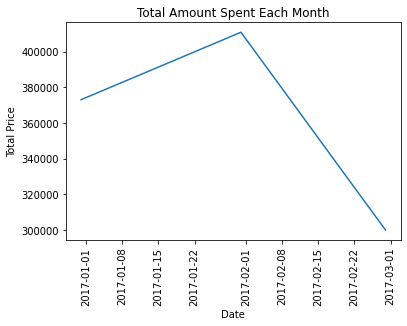

In [38]:
# line plot of total amount spent each month
monthly_totals = data.groupby(pd.Grouper(key='date', freq='M'))['total'].sum()
plt.plot(monthly_totals.index, monthly_totals.values)
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Total Price')
plt.title('Total Amount Spent Each Month')
plt.show()

WE can observe growth until the beginning of January 2017 and after a sharp decline

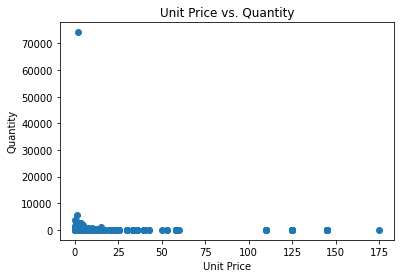

In [39]:
#scatter plot of 'unit_price' vVS 'quantity'
plt.scatter(data['price_per_one'], retail['quantity'])
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title('Unit Price vs. Quantity')
plt.show()

We can see that the majority of the transactions have a low unit price and a small quantity. Lets zoom this graph.

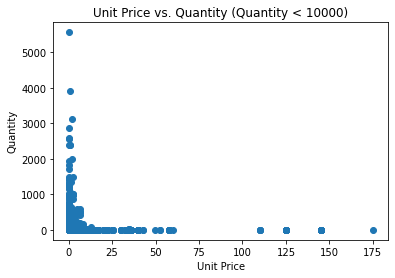

In [40]:
filtered_data = data[data['quantity'] < 10000]

plt.scatter(filtered_data['price_per_one'], filtered_data['quantity'])
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title('Unit Price vs. Quantity (Quantity < 10000)')
plt.show()

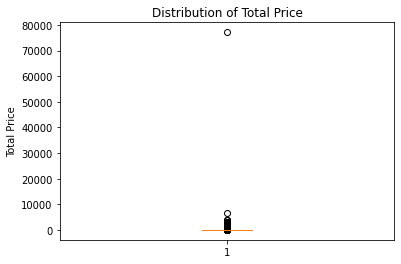

In [41]:
# box plot of 'total_price'
plt.boxplot(data['total'])
plt.ylabel('Total Price')
plt.title('Distribution of Total Price')
plt.show()

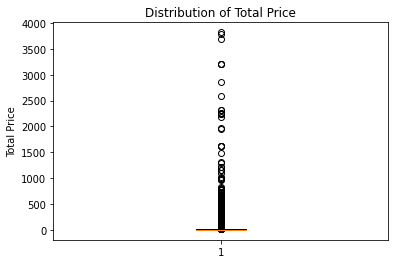

In [42]:
#filtered data 
filtered_data_total = data[data['total']<6000] 

plt.boxplot(filtered_data_total['total'])
plt.ylabel('Total Price')
plt.title('Distribution of Total Price')
plt.show()

In [43]:
# investigate outlieres. descriptive statistics
print("Total mean:", data['total'].mean())
print("Total median:", data['total'].median())
print("Total standart deviation:", data['total'].std())

Total mean: 10.60328683505175
Total median: 1.65
Total standart deviation: 247.05378812416657


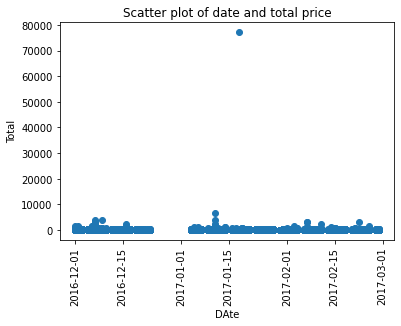

In [44]:
plt.scatter(data['date1'], data['total'])

plt.title('Scatter plot of date and total price')
plt.xlabel('DAte')
plt.ylabel('Total')
plt.xticks(rotation=90)

plt.show()

In [45]:
#delete outlieres
Q1 = data['total'].quantile(0.25)
Q3 = data['total'].quantile(0.75)
IQR = Q3 - Q1
outliers = (data['total'] < Q1 - 1.5 * IQR) | (data['total'] > Q3 + 1.5 * IQR)
data = data[~outliers]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94352 entries, 0 to 102225
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   purchase_id    94352 non-null  object        
 1   item_id        94352 non-null  object        
 2   quantity       94352 non-null  int64         
 3   date           94352 non-null  datetime64[ns]
 4   cust_id        59061 non-null  float64       
 5   lp             94352 non-null  int64         
 6   shop_id        94352 non-null  object        
 7   date1          94352 non-null  object        
 8   price_per_one  94352 non-null  float64       
 9   total          94352 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.9+ MB


In [46]:
# What item sells the most
item_count = data.groupby(['item_id']).agg({'purchase_id':'count','price_per_one':'sum'})
item_count.columns = ['purchase_count', 'total_sum']
item_count.sort_values('total_sum', ascending=False)

purchase_count  total_sum
item_id                           
22720               332    1411.00
21843               116    1154.20
85066               102    1116.90
22827                 7    1015.00
21754               177     964.65
...                 ...        ...
22242                35       0.00
84406B              113       0.00
20878                 8       0.00
84452                 6       0.00
72803B                1       0.00

[3086 rows x 2 columns]

In [47]:
fig = px.histogram(item_count, x='purchase_count', nbins = 100, title = 'Orders')

fig.show()

Lets drop items with 0 price to find the most ptrofitble item/

In [48]:
#item_count without 0
item_count_price = item_count.query('total_sum >0')
item_count_price = item_count.sort_values('total_sum', ascending=False)
item_count_price.head()

purchase_count  total_sum
item_id                           
22720               332    1411.00
21843               116    1154.20
85066               102    1116.90
22827                 7    1015.00
21754               177     964.65

Here we see the most profitble items.

In [49]:
fig = px.histogram(item_count_price, x='purchase_count', nbins = 100, title = 'Orders')

fig.show()

In [50]:
#sort different way
item_count.sort_values('purchase_count', ascending=False)

purchase_count  total_sum
item_id                           
85123A              545       0.00
22423               442       0.00
85099B              363       0.00
22469               351     508.95
22720               332    1411.00
...                 ...        ...
90026C                1       8.50
90026B                1       8.50
90024E                1       8.49
90024B                1       8.32
m                     1       2.55

[3086 rows x 2 columns]

There are items that dont have price. 

' All of its customers have membership cards. Moreover, they can become members of the store's loyalty program for $20 per month. The program includes discounts, information on special offers, and gifts. '

We can assume that these are gifts received under the loyalty program

In [51]:
data.sample()

purchase_id item_id  quantity                date  cust_id  lp shop_id  \
96874      539744  84559a         0 2016-12-21 15:21:00      NaN   0  Shop 0   

            date1  price_per_one  total  
96874  2016-12-21           1.66    0.0

In [52]:
num_transactions = len(data[(data['price_per_one'] == 0) & (data['lp'] == 1)])
print("Number of transactions with 0 price per one and loyalty program: ", num_transactions)

Number of transactions with 0 price per one and loyalty program:  3651


In [53]:
# Find the share of members and non members of loyality program
num_loyalty_members = len(data[data['lp'] == 1])
num_non_members = len(data[data['lp'] == 0])
total_customers = num_loyalty_members + num_non_members

share_loyalty_members = num_loyalty_members / total_customers
share_non_members = num_non_members / total_customers

print("Share of loyalty program members: {:.2f}%".format(share_loyalty_members * 100))
print("Share of non-members: {:.2f}%".format(share_non_members * 100))


Share of loyalty program members: 22.28%
Share of non-members: 77.72%


In [54]:
# Members and non members of loyality program per shop
loyalty_members_by_shop = data[data['lp'] == 1].groupby('shop_id').size()
non_members_by_shop = data[data['lp'] == 0].groupby('shop_id').size()

print("Number of loyalty program members by shop:\n", loyalty_members_by_shop)
print("Number of non-members by shop:\n", non_members_by_shop)


Number of loyalty program members by shop:
 shop_id
Shop 0     770
Shop 1     899
Shop 10    598
Shop 11    841
Shop 12    481
Shop 13    942
Shop 14    674
Shop 15    771
Shop 16    594
Shop 17    680
Shop 18    666
Shop 19    573
Shop 2     917
Shop 20    689
Shop 21    609
Shop 22    810
Shop 23    601
Shop 24    865
Shop 25    602
Shop 26    767
Shop 27    598
Shop 28    570
Shop 29    657
Shop 3     584
Shop 30    587
Shop 4     455
Shop 5     707
Shop 6     465
Shop 7     682
Shop 8     622
Shop 9     744
dtype: int64
Number of non-members by shop:
 shop_id
Shop 0     36426
Shop 1      1548
Shop 10     1218
Shop 11     1180
Shop 12     1035
Shop 13     1061
Shop 14     1456
Shop 15     1540
Shop 16     1055
Shop 17     1224
Shop 18     1061
Shop 19     1322
Shop 2      1052
Shop 20     1436
Shop 21      835
Shop 22     1431
Shop 23     1155
Shop 24     1429
Shop 25      953
Shop 26     1264
Shop 27     1388
Shop 28     1382
Shop 29     1303
Shop 3       859
Shop 30     1486
Shop 

Conclusion:

We  have Timedelta 89 days 08:35:00 = 3 months

We have created a new column with data format YYYY-MM-DD

We have created graph “Events count by date” and saw Christmas seasonality there

We renamed columns and merged retail and product together. Called new table “data”

 We have created a new column “total”
 
Build line plot of total amount spent each month. WE saw growth until the beginning of January 2017 and after a sharp decline. So again we can think about Christmas seasonality.

Build scatter plot of 'unit_price' VS 'quantity'. We saw that the majority of the transactions have a low unit price and a small quantity. basically unit price is not much then 60$

Build box plot of 'total_price'. heavy outliers. Filtered data and build new graph with “total” < 6000.

Investigated those outliers. The data has a large standard deviation of 247.05, which indicates that the data points are spread out over a wide range. The mean of 10.60 is higher than the median of 1.65, which suggests that the data may be positively skewed, meaning there may be some extreme values that are pulling the mean upwards. Deleted outliers/

Top 5 five items that sell the most and Top 5 most profitable items -
22720 21843 85066 22827 21754

There are items that dont have price.

' All of its customers have membership cards. Moreover, they can become members of the store's loyalty program for $20 per month. The program includes discounts, information on special offers, and gifts. '

We can assume that these are gifts received under the loyalty program

Number of transactions with 0 price per one and loyalty program:  3651

Share of loyalty program members: 22.28%

Share of non-members: 77.72%

The biggest amount of non-members by shop 0 - 36426

The biggest amount of members by shop 13 - 942


## Look into the relationship between revenue growth and the probability of churn.

In [55]:
# Calculate the number of unique customers who made at least one purchase
num_customers = data['cust_id'].nunique()

# Calculate the number of unique customers who made more than one purchase
repeat_customers = data.groupby('cust_id').filter(lambda x: len(x) > 1)
num_repeat_customers = repeat_customers['cust_id'].nunique()

# Calculate the repeat purchase rate
repeat_purchase_rate = num_repeat_customers / num_customers * 100

print("Repeat purchase rate: {:.2f}%".format(repeat_purchase_rate))


Repeat purchase rate: 96.43%


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<AxesSubplot:title={'center':'Revenue Growth Rate by Loyalty Program Status'}, xlabel='date'>

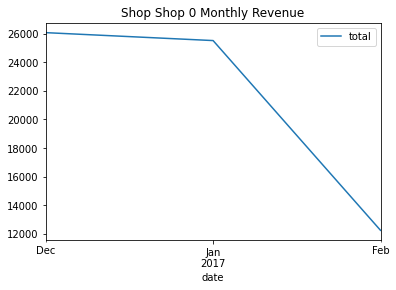

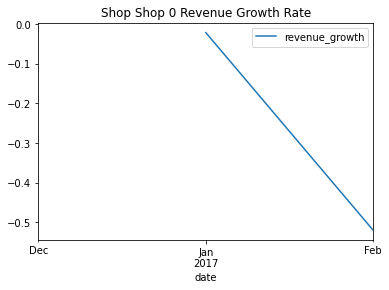

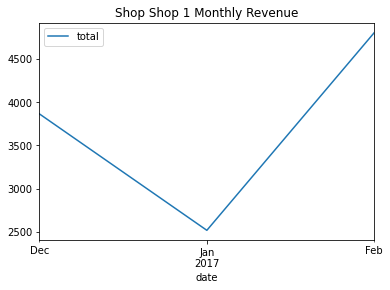

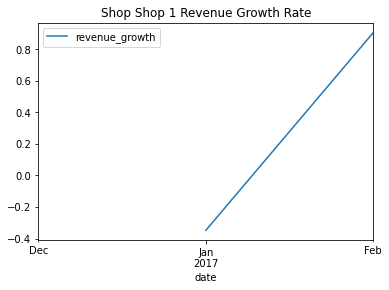

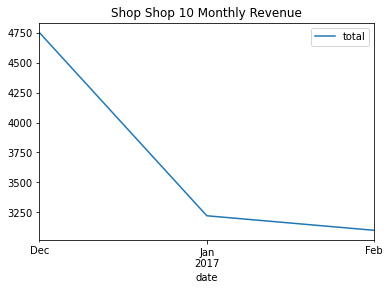

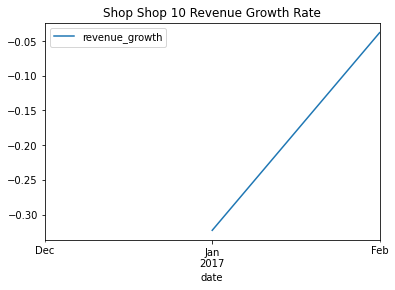

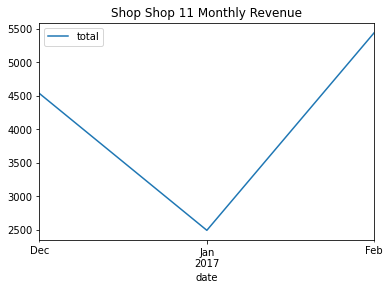

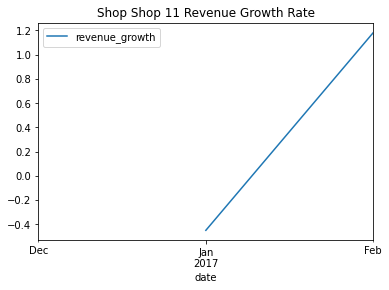

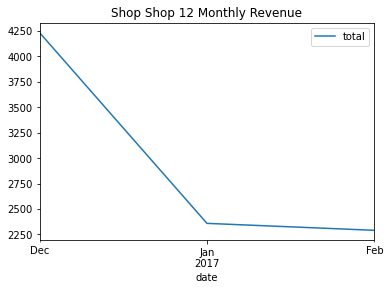

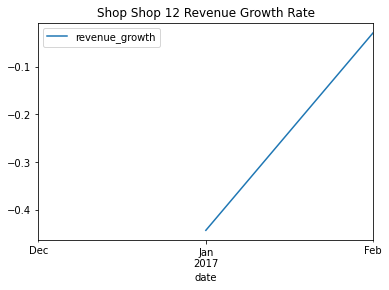

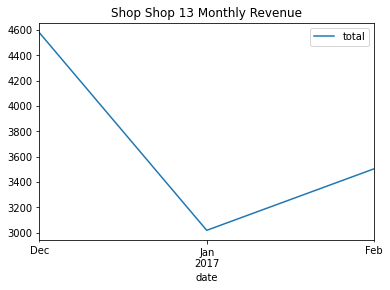

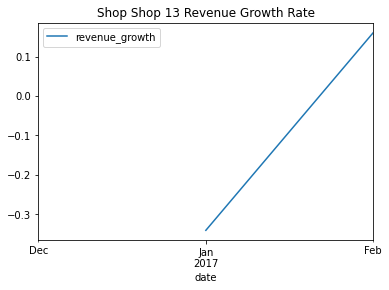

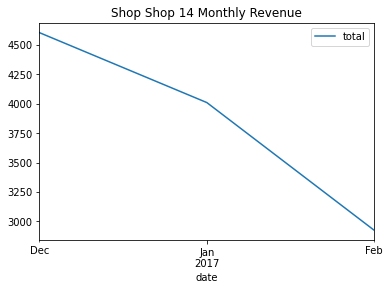

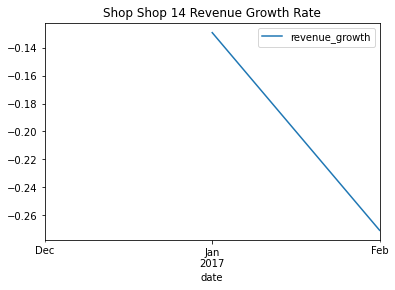

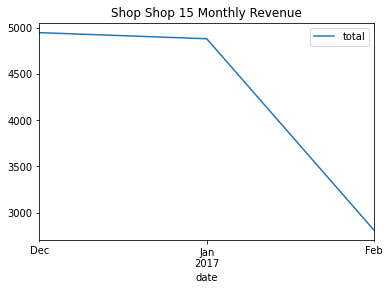

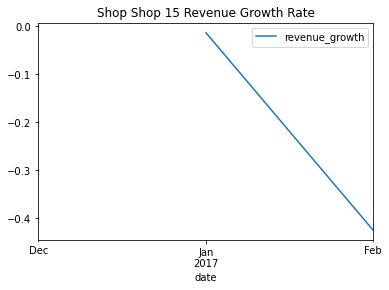

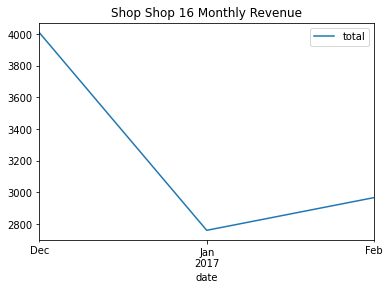

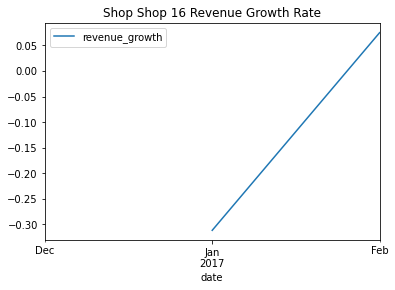

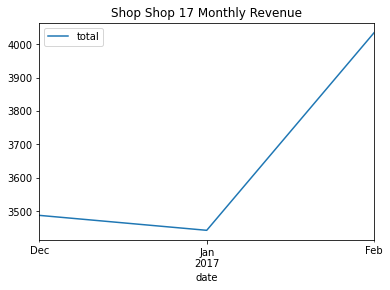

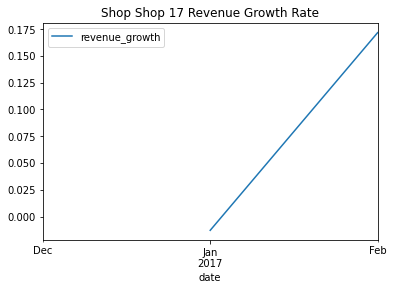

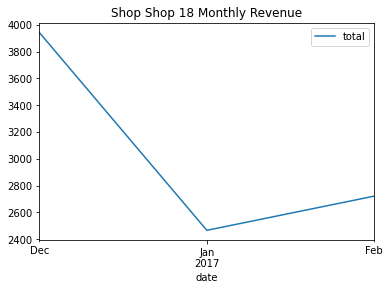

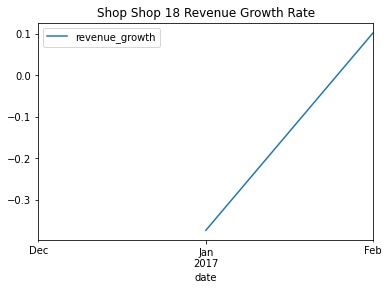

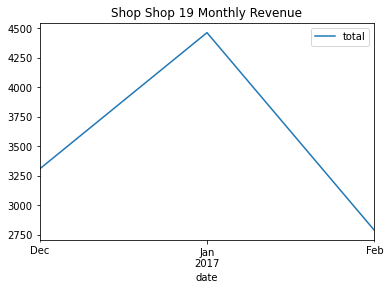

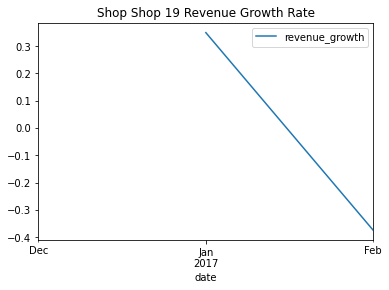

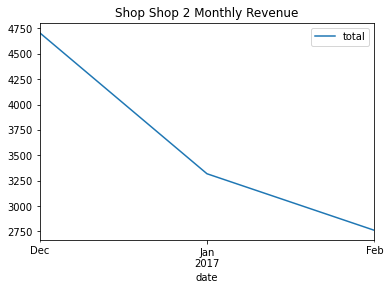

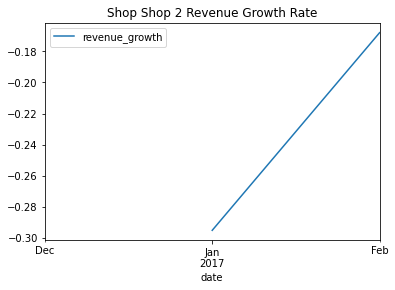

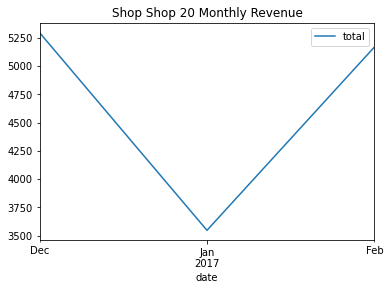

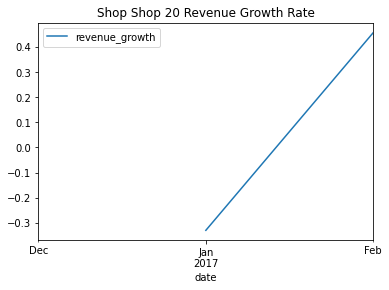

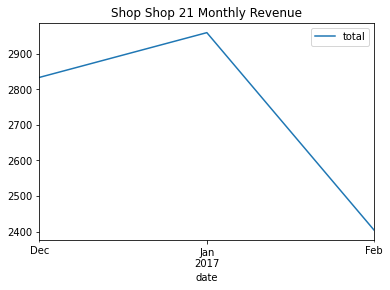

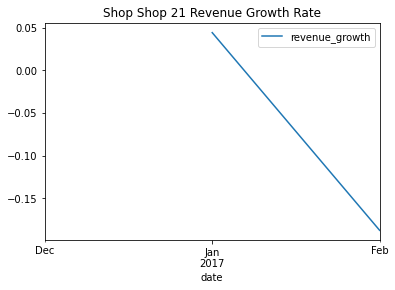

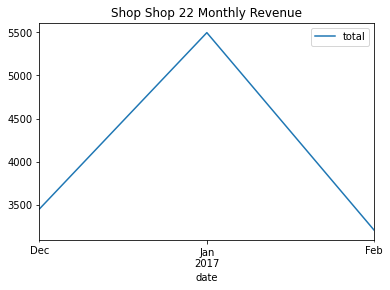

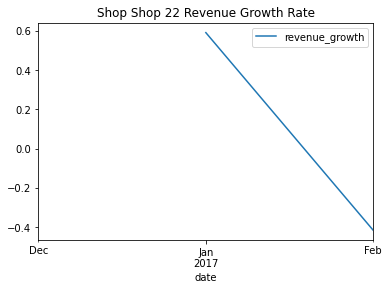

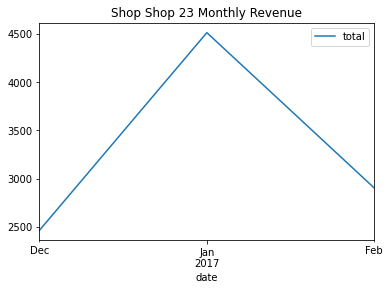

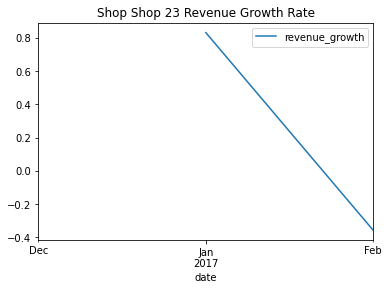

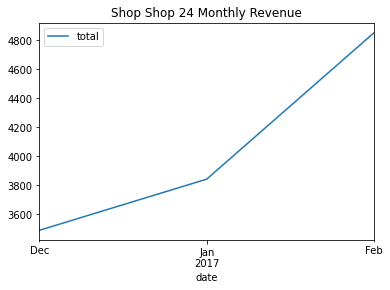

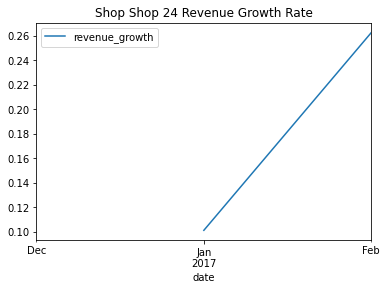

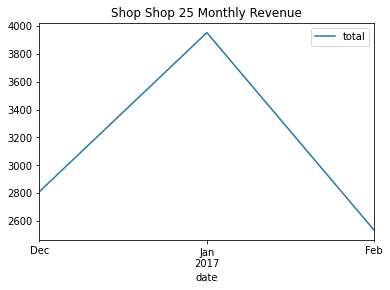

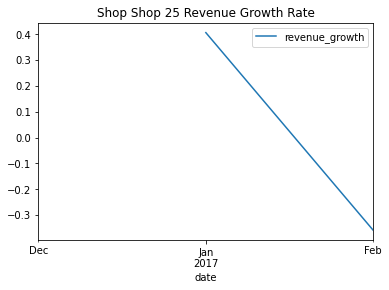

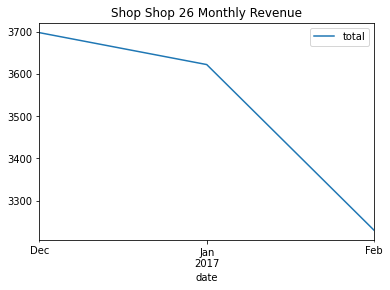

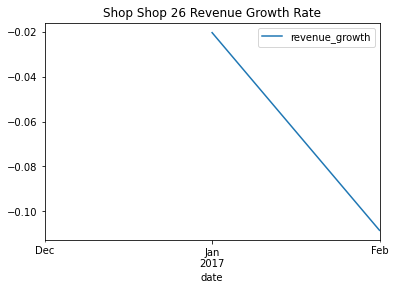

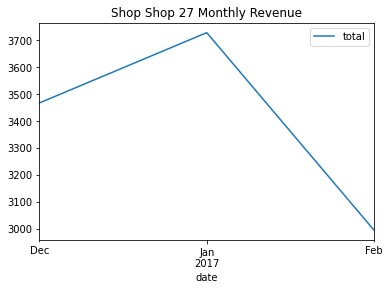

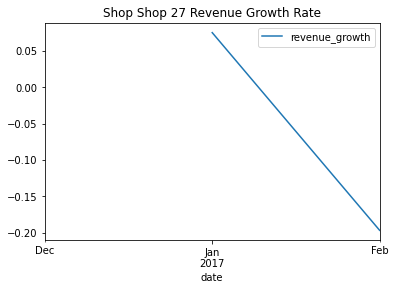

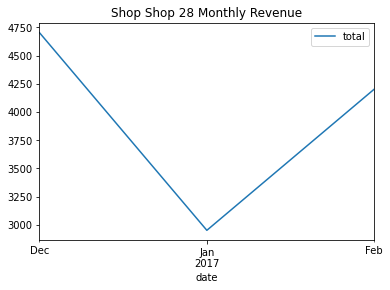

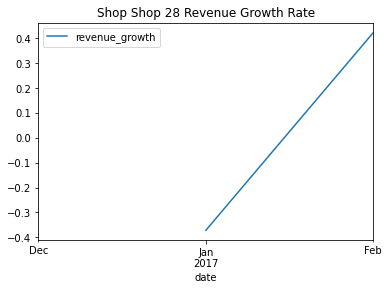

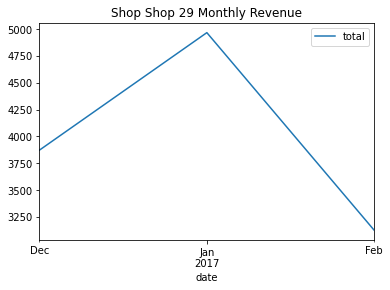

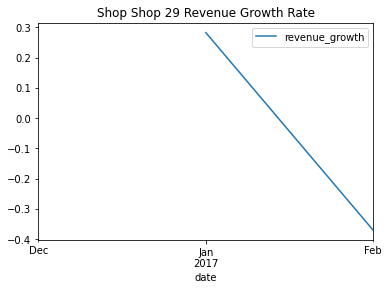

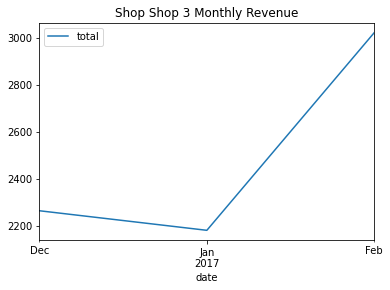

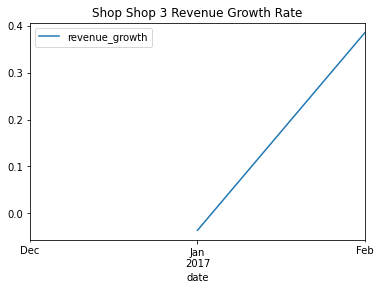

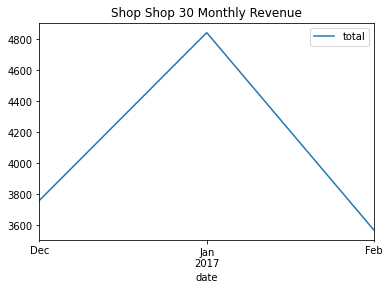

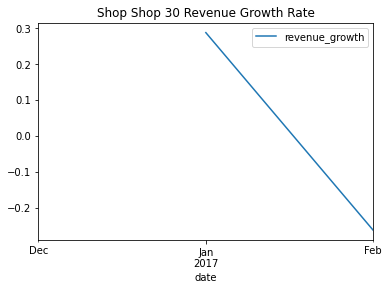

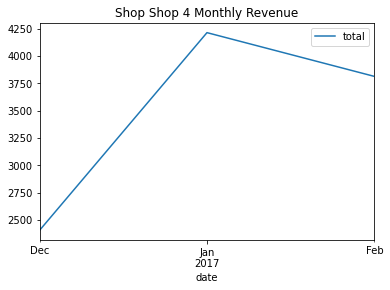

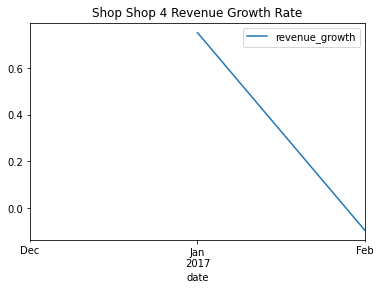

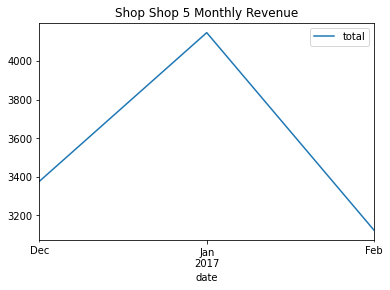

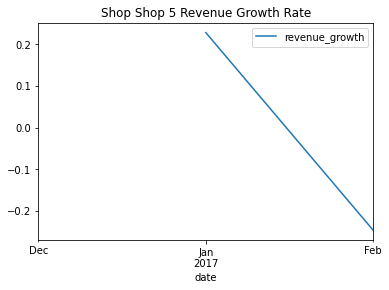

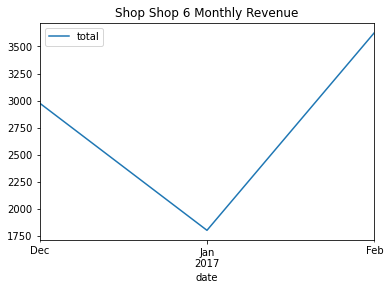

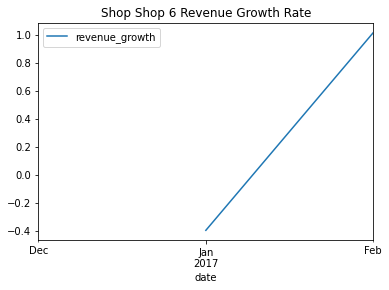

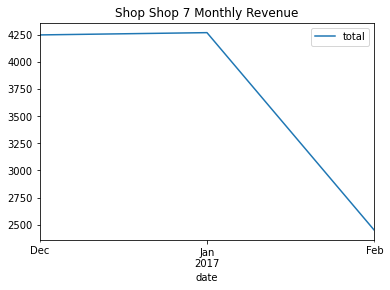

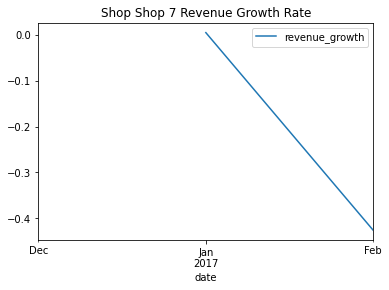

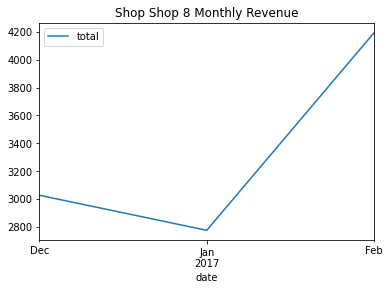

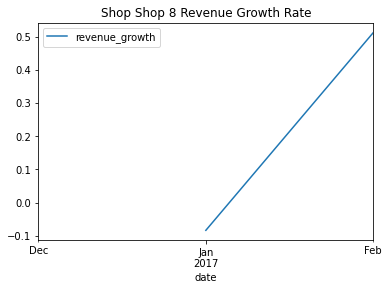

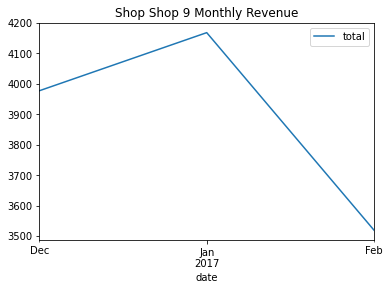

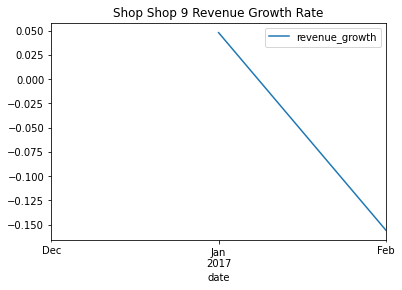

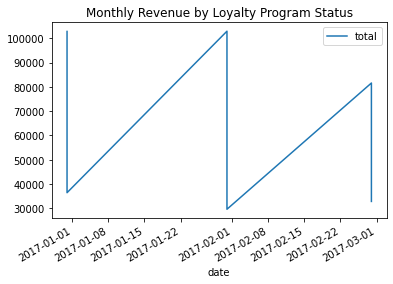

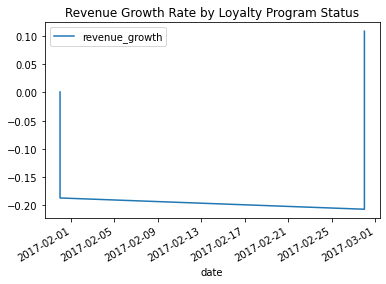

In [56]:
# Calculate monthly revenue for each shop
monthly_revenue = data.groupby(['shop_id', pd.Grouper(key='date', freq='M')])['total'].sum().reset_index()

# Calculate revenue growth rate for each shop
monthly_revenue['revenue_growth'] = monthly_revenue.groupby('shop_id')['total'].pct_change()

# Calculate revenue and revenue growth rate for loyalty program members and non-members
lp_revenue = data.groupby(['lp', pd.Grouper(key='date', freq='M')])['total'].sum().reset_index()
lp_revenue['revenue_growth'] = lp_revenue.groupby('lp')['total'].pct_change()

# Plot monthly revenue and revenue growth rate for each shop
for shop_id, data in monthly_revenue.groupby('shop_id'):
    data.plot(x='date', y='total', title=f'Shop {shop_id} Monthly Revenue')
    data.plot(x='date', y='revenue_growth', title=f'Shop {shop_id} Revenue Growth Rate')

# Plot revenue and revenue growth rate for loyalty program members and non-members
lp_revenue.plot(x='date', y='total', by='loyality_program', title='Monthly Revenue by Loyalty Program Status')
lp_revenue.plot(x='date', y='revenue_growth', by='loyality_program', title='Revenue Growth Rate by Loyalty Program Status')



In [80]:
monthly_revenue.head(20)

shop_id       date     total  revenue_growth
0    Shop 0 2016-12-31  26076.41             NaN
1    Shop 0 2017-01-31  25521.69       -0.021273
2    Shop 0 2017-02-28  12244.15       -0.520245
3    Shop 1 2016-12-31   3862.99             NaN
4    Shop 1 2017-01-31   2518.83       -0.347958
5    Shop 1 2017-02-28   4801.74        0.906337
6   Shop 10 2016-12-31   4752.95             NaN
7   Shop 10 2017-01-31   3219.29       -0.322675
8   Shop 10 2017-02-28   3097.45       -0.037847
9   Shop 11 2016-12-31   4534.81             NaN
10  Shop 11 2017-01-31   2495.26       -0.449754
11  Shop 11 2017-02-28   5442.03        1.180947
12  Shop 12 2016-12-31   4233.83             NaN
13  Shop 12 2017-01-31   2359.01       -0.442819
14  Shop 12 2017-02-28   2290.65       -0.028978
15  Shop 13 2016-12-31   4578.33             NaN
16  Shop 13 2017-01-31   3017.55       -0.340906
17  Shop 13 2017-02-28   3503.38        0.161001
18  Shop 14 2016-12-31   4604.87             NaN
19  Shop 14 2017-01-31   4010.13       -0.129155

Conclusion:

We calculated the number of unique customers who made at least one purchase. Repeat purchase rate: 96.43%. So we can see that there is good percentage of people who return 

We calculated monthly revenue for each shop. We looked for three month: December, January and February. 


Shop 0 we see decreasing monthly revenue since December.
Shop 1- decrese until the January and then revenue going up.

Shop 10- decrease since January

Shop 11- increase since January


## Find the most valueable items per shop

In [58]:
data = retail.merge(product, on = 'item_id')
data['total'] = data['quantity'] * data['price_per_one']
data.head()

purchase_id item_id  quantity                date  cust_id  lp  shop_id  \
0      538280   21873        11 2016-12-10 12:50:00  18427.0   0   Shop 3   
1      541104   21873         0 2017-01-13 14:29:00      NaN   0   Shop 0   
2      540418   21873         1 2017-01-07 11:04:00      NaN   0   Shop 0   
3      541516   21873         2 2017-01-18 17:34:00      NaN   0   Shop 0   
4      541566   21873        35 2017-01-19 11:50:00  23401.0   1  Shop 22   

        date1  price_per_one  total  
0  2016-12-10           0.42   4.62  
1  2017-01-13           0.42   0.00  
2  2017-01-07           0.42   0.42  
3  2017-01-18           0.42   0.84  
4  2017-01-19           0.42  14.70

In [78]:
#  the most valueable items per shop
shops_group = data.groupby(['shop_id','item_id']).agg({'item_id':'count',
                                                              'price_per_one':'sum'})
shops_group.columns = ['item_count','value_of_order']
shops_group = shops_group.sort_values('value_of_order',ascending=False)
shops_group.head(20)

item_count  value_of_order
shop_id item_id                            
Shop 0  DOT             174          436.74
        22165            36          388.44
        22655             3          375.00
        22720            76          323.00
        85066            29          317.55
        21257            44          305.80
        22424            28          303.80
        84968C           36          298.44
        22839            23          293.25
        22960            78          292.50
        22171            38          290.70
        22111            67          284.75
        21523            41          276.75
        22167            33          273.57
        84968A           33          273.57
        21754            48          261.60
        21216            61          259.25
Shop 14 22655             2          250.00
Shop 0  22835            58          246.50
        84078A            7          244.65

In [60]:
#  top selling items per shop
sales_by_shop = data.groupby(['shop_id', 'item_id'])['quantity'].sum().reset_index()
top_sellers_by_shop = sales_by_shop.sort_values(by='quantity', ascending=False)

for shop in top_sellers_by_shop['shop_id'].unique():
    print(f"Top sellers for shop {shop}:")
    print(top_sellers_by_shop[top_sellers_by_shop['shop_id'] == shop].head())


Top sellers for shop Shop 15:
       shop_id item_id  quantity
10141  Shop 15   23166     74214
9212   Shop 15   16014      1499
9824   Shop 15   22469      1410
9825   Shop 15   22470      1345
10362  Shop 15  85123A      1323
Top sellers for shop Shop 0:
     shop_id item_id  quantity
1739  Shop 0   37413      5567
1901  Shop 0  79063D      2559
1077  Shop 0   22355      2339
340   Shop 0   21212      1753
495   Shop 0   21479      1467
Top sellers for shop Shop 30:
       shop_id item_id  quantity
27523  Shop 30   22053      3905
27298  Shop 30   21212      1670
27806  Shop 30   22616       739
27735  Shop 30   22492       718
28235  Shop 30  85123A       465
Top sellers for shop Shop 3:
      shop_id item_id  quantity
27060  Shop 3   84077      3501
26225  Shop 3   17003      1478
26504  Shop 3   21915      1404
26213  Shop 3   15036       599
26219  Shop 3   16033       479
Top sellers for shop Shop 20:
       shop_id item_id  quantity
15618  Shop 20   21108      3113
16656  Shop 

In [61]:
# most popular item in several stores
top_sellers_by_shop.groupby('item_id')['shop_id'].count().sort_values(ascending=False)

item_id
48187     31
21080     31
22988     31
21915     31
47566     31
          ..
35933      1
20820      1
21491      1
84534b     1
m          1
Name: shop_id, Length: 3102, dtype: int64

Conclusion:
    
In this part of research we can find information about the most valueable items per shop. 



## Customers

In [62]:
# For each customer, find the date of the last purchase
# group by customer and select the maximum date
last_purchase_dates = data.groupby('cust_id')['date'].max()
print(last_purchase_dates)

cust_id
18025.0   2017-01-18 10:01:00
18026.0   2017-01-26 14:30:00
18027.0   2017-01-25 10:42:00
18029.0   2017-02-02 16:01:00
18031.0   2017-02-16 12:33:00
                  ...        
23936.0   2017-02-22 11:05:00
23938.0   2016-12-08 13:38:00
23939.0   2017-01-09 14:42:00
23948.0   2016-12-08 13:53:00
23962.0   2017-02-28 10:30:00
Name: date, Length: 1682, dtype: datetime64[ns]


In [63]:
# customer per shop
customers_per_shop = data.groupby('shop_id').agg({'cust_id':'count',  'item_id':'nunique'}).sort_values('cust_id',ascending=False).reset_index()
customers_per_shop.columns = ['shop_id','purchase_count','unique_items_sold']
customers_per_shop.head(12)

shop_id  purchase_count  unique_items_sold
0    Shop 1            2645               1232
1   Shop 15            2618               1216
2   Shop 24            2535               1180
3   Shop 22            2469               1161
4    Shop 5            2423               1107
5    Shop 9            2390               1143
6   Shop 20            2367               1191
7   Shop 13            2357               1076
8   Shop 14            2328               1150
9   Shop 30            2313               1093
10   Shop 0            2289               2675
11   Shop 7            2247               1093

In [64]:
# who buys more loyality program customers or non
lp_data= data.groupby('lp').agg({'price_per_one':'sum','purchase_id':'count'})
lp_data.columns= ['total_value_purchased','total_purchases_count']
lp_data

total_value_purchased  total_purchases_count
lp                                              
0               161277.05                  79253
1                48341.91                  22973

In [65]:
# let's see which shops are used more by both groups
lp_shops = data.groupby(['shop_id','lp']).agg({'price_per_one':'sum','purchase_id':'count'})
lp_shops.columns= ['total_value_purchased','total_purchases_count']
lp_shops.head()

total_value_purchased  total_purchases_count
shop_id lp                                              
Shop 0  0                69849.00                  37129
        1                 1970.77                    827
Shop 1  0                 3671.12                   1699
        1                 1859.06                    946
Shop 10 0                 3669.42                   1461

In [66]:
#shops where non members bought the most items
non_members = lp_shops.xs(0,level=1)
non_members.sort_values('total_purchases_count',ascending=False).head()

total_value_purchased  total_purchases_count
shop_id                                              
Shop 0                69849.00                  37129
Shop 15                3839.05                   1813
Shop 1                 3671.12                   1699
Shop 5                 3358.80                   1664
Shop 30                3375.89                   1646

In [67]:
fig = px.bar(non_members, x='total_value_purchased', title = 'Orders')

fig.show()

In [68]:
# shops where members brought the most value
members = lp_shops.xs(1,level=1)
members.sort_values('total_value_purchased',ascending=False).head()

total_value_purchased  total_purchases_count
shop_id                                              
Shop 2                 2336.45                    984
Shop 13                2129.05                   1019
Shop 26                1975.89                    860
Shop 0                 1970.77                    827
Shop 1                 1859.06                    946

<hr>
<b>Anton's comments:</b> Hi Maria! Thanks for sending in the project. The project looks good, I see that you've spent a lot of time on it.

<ul>
    <li><b>Data cleaning:</b> Looks ok, no critical comments there </li>
    <li><b>EDA:</b> <i>There are some graphs that you did with heavy outliers - would it make sense to sort them out? I wouldn't look into the shoppers metrics like churn rate further, as we have really little data sample for this analysis. But kudos for trying!</li>
    <li><b>Hypothesis:</b> Not provided</li>
    <li><b>Results:</b> Not provided</li>
    <li><b>Documentation:</b> Not provided, please provide 5-7 resources you used to finish the project with the explanations how they helped you</li>
    <li><b>Dashboard:</b> Not provided</li>
    <li><b>Presentation:</b> Not provided</li>
</ul>
Overall - great job! We should finish in no time :)

## Hypotheses

In [69]:
data.head()

purchase_id item_id  quantity                date  cust_id  lp  shop_id  \
0      538280   21873        11 2016-12-10 12:50:00  18427.0   0   Shop 3   
1      541104   21873         0 2017-01-13 14:29:00      NaN   0   Shop 0   
2      540418   21873         1 2017-01-07 11:04:00      NaN   0   Shop 0   
3      541516   21873         2 2017-01-18 17:34:00      NaN   0   Shop 0   
4      541566   21873        35 2017-01-19 11:50:00  23401.0   1  Shop 22   

        date1  price_per_one  total  
0  2016-12-10           0.42   4.62  
1  2017-01-13           0.42   0.00  
2  2017-01-07           0.42   0.42  
3  2017-01-18           0.42   0.84  
4  2017-01-19           0.42  14.70

Hypothesis : membership in the loyalty program is positively correlated with higher sales per outlet



In [70]:
sales_per_outlet = data.groupby("shop_id")["total"].sum()

# Calculate the percentage of customers who are loyalty program members per outlet
loyalty_per_outlet = data.groupby("shop_id")["lp"].mean()

# Calculate the correlation coefficient
correlation = np.corrcoef(loyalty_per_outlet, sales_per_outlet)[0, 1]

print("Correlation between loyalty program membership and sales per outlet:", correlation)

Correlation between loyalty program membership and sales per outlet: -0.6053793284833499


The correlation coefficient between loyalty program membership and sales per outlet of -0.605 indicates a moderate negative correlation between these two variables. This means that there is a tendency for outlets with higher loyalty program membership rates to have lower sales volumes, and vice versa. 

Link to DAshboard https://public.tableau.com/authoring/Retail_16822781990570/Dashboard1#1